Partimos de este conjunto de datos y queremos hacer un modelo de clasificación

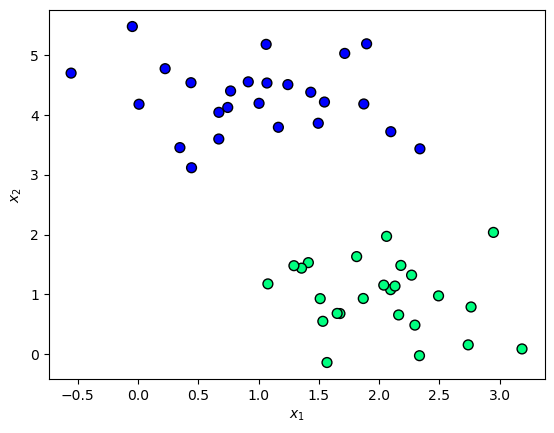

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

Existen infinitos separadores (modelos) que separan perfectamente ambas clases

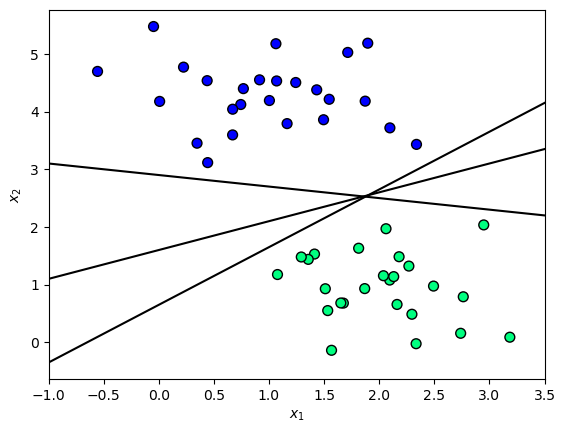

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')


for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

¿Cuál es el mejor separador? 

Empecemos analizando cuál es el separador de la regresión logística

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X,y)
lr.intercept_, lr.coef_

(array([4.81393202]), array([[ 0.57306256, -2.18013484]]))

$\Large y = \theta(4.81 + 0.573x_1 - 2.18x_2)$, donde $\Large \theta$ es la función sigmoide:

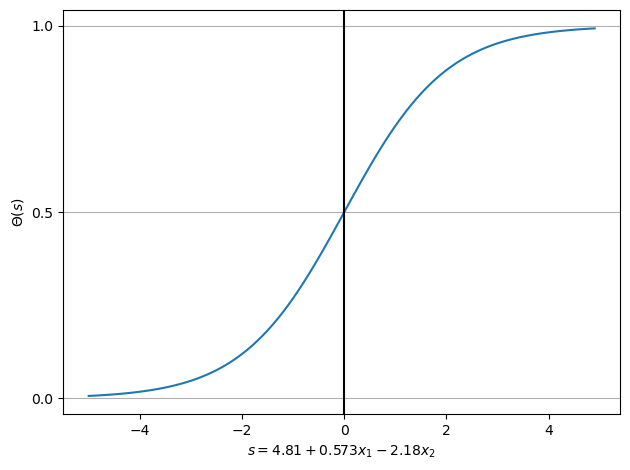

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.arange(-5, 5, 0.1)
phi_z = sigmoid(z)
 
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('$s=4.81 + 0.573x_1 - 2.18x_2$')
plt.ylabel('$\Theta(s)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

En regresión logística, la predicción queda determinada por la ecuación $\theta(s)=\theta(w_0+w_1x_1+w_2x_2+...+w_Nx_N)$. Cuando $s=0$,  $\theta(s)=0.5$, que suele ser el umbral para clasificar una categoría u otra. 

En este ejemplo $s=4.81 + 0.573x_1 - 2.18x_2$. Si igualamos a cero, obtenemos la ecuación de la recta separadora:

$4.81 + 0.573x_1 - 2.18x_2=0$  
  
$2.18x_2 = 0.573x_1 + 4.81$   
  
$x_2=\frac{0.573}{2.18}x_1 + \frac{4.81}{2.18}$
  
$x_2 = 0.263x_1 + 2.206 $

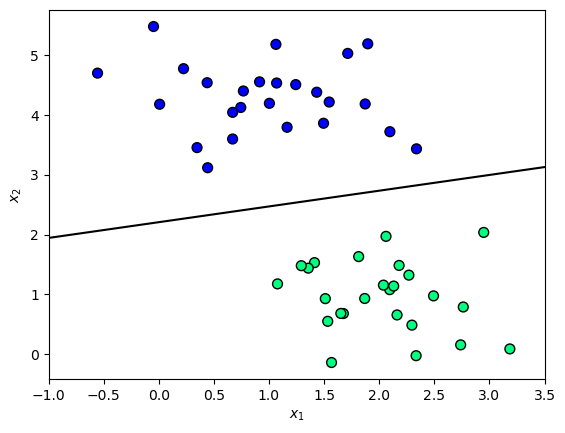

In [18]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
m=0.263
b=2.206
plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

**Support vector machines** busca establecer un separador con el mayor margen posible a las muestras más cercanas

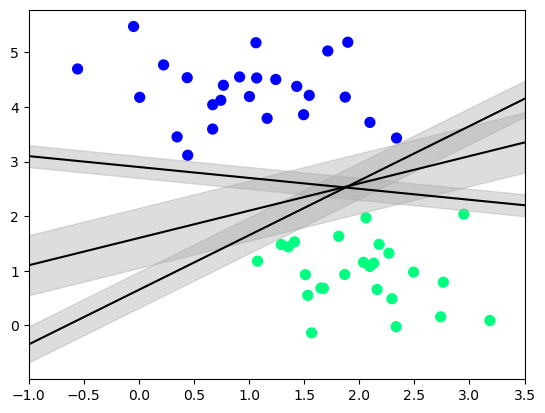

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

La recta separadora que maximice este margen será escogida como el mejor modelo.

In [9]:
from sklearn.svm import SVC # "support vector classifier"

model = SVC(kernel='linear', C=1e10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1,facecolors='none', edgecolors='r');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

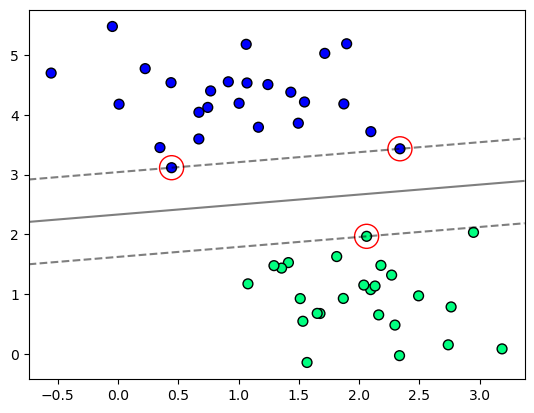

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');
plot_svc_decision_function(model);


Esta recta separadora maximiza el margen entre los dos conjuntos de puntos. Fíjate que alguno de los puntos están justo en el margen, indicados con círculos rojos. Estos puntos son los vectores de soporte, que dan nombre al algoritmo.

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Si pintamos la recta de la regresión logística que calculamos anteriormente, vemos que no es exactamente la misma

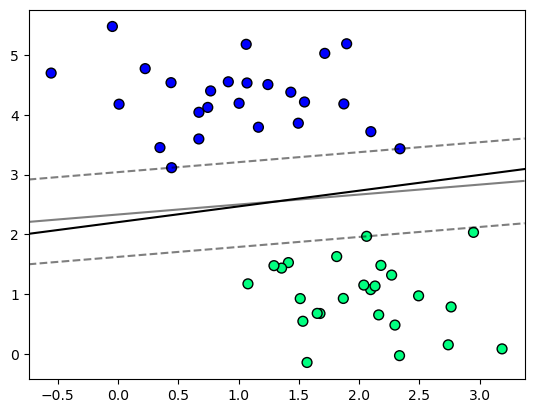

In [20]:
# Datos
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='winter', edgecolors='k')

# SVM
plot_svc_decision_function(model, plot_support=False)

# Regresión Logística
xfit = np.linspace(-1, 3.5)
m=0.263
b=2.206
plt.plot(xfit, m * xfit + b, '-k')

Este algoritmo es sensible al escalado de las variables

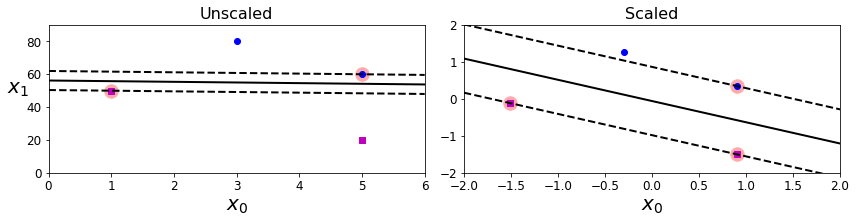

Una ventaja de este algoritmo es que solo importa la posición de los vectores de soporte situados en el margen, el resto de puntos no influye en el ajuste del modelo. Esto también puede ser un inconveniente si el dataset contiene outliers. Además, ¿qué ocurre si los datos no son tan perfectamente separables?

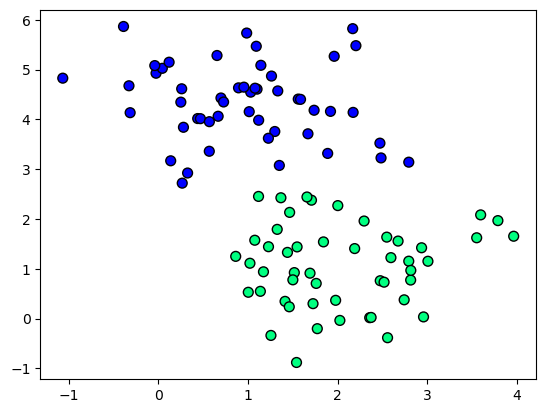

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');

Para estos casos, SVM tiene un hiperparámetro, conocido como $C$, que suaviza el margen, es decir, permite que algunos puntos caigan dentro del margen, mejorando el ajuste. Si $C$ es muy alto, el margen es rígido y los puntos no pueden sobrepasarlo. Para valores de $C$ menores, el margen se suaviza.

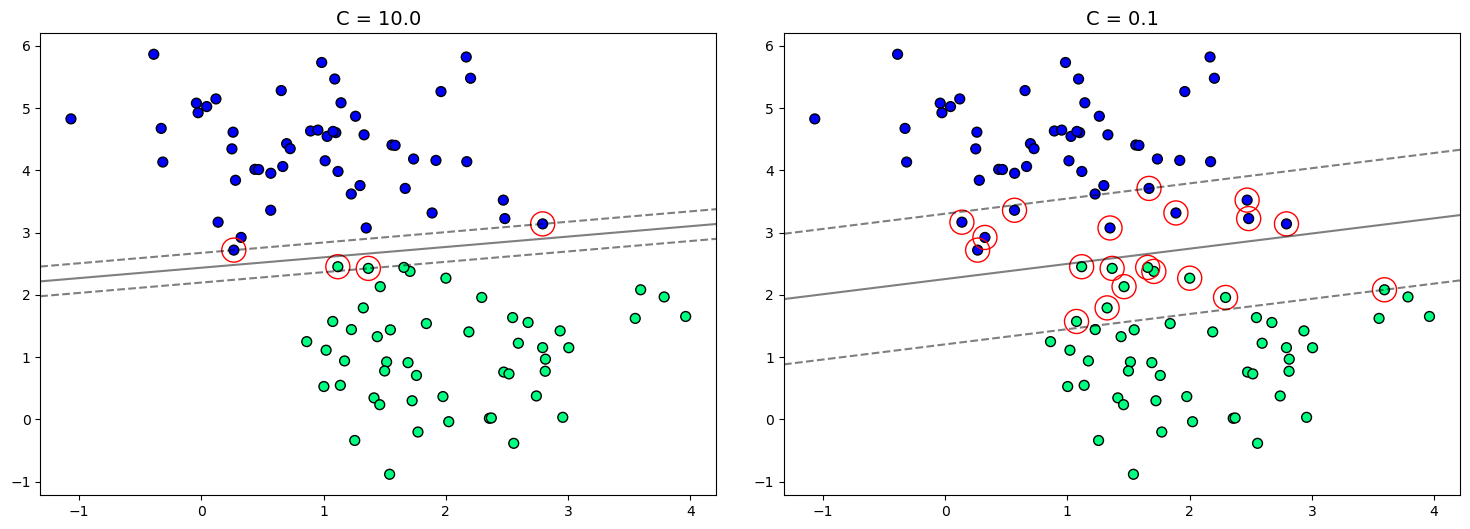

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

El valor óptimo del hiperparámetro $C$ dependerá del dataset, y habrá que optimizarlo con el ajuste de hiperparámetros

### SVM como clasificadores no lineales

SVM también permite crear separadores no lineales, a través de los llamados *kernels*, en los que se eleva la dimensión de los datos, haciendo que sean linealmente separables en esa nueva dimensión

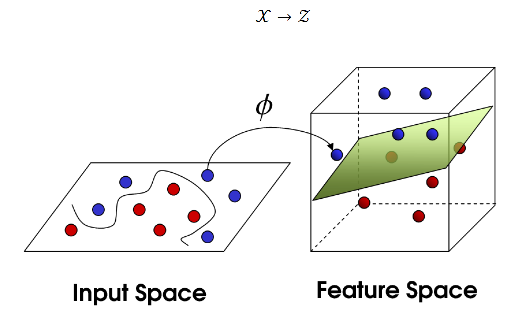


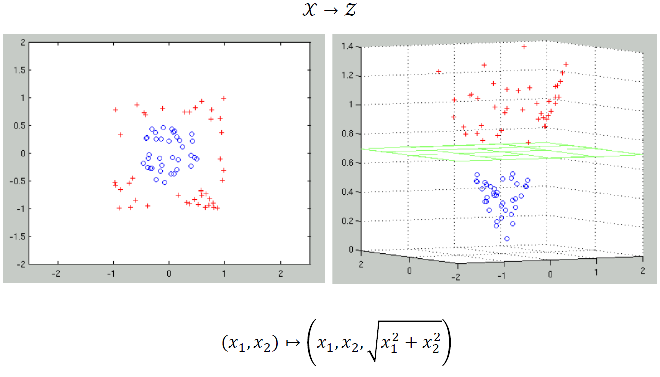

**Kernel polinómico**: Transformamos la dimensión de entrada a través de un polinomio de grado *d*. Por ejemplo, para $d=2$: 
$(x_1, x_2) \rightarrow (x_1, x_2, x_1x_2, x_1^2, x_2^2)$  

**Kernel RBF (Radial Basis Function)**: traslada los datos a una dimensión infinita  
$(x_1, x_2) \rightarrow \exp(-\gamma||x_1 - x_2||^2)$

Veamos algún ejemplo con datos no linealmente separables

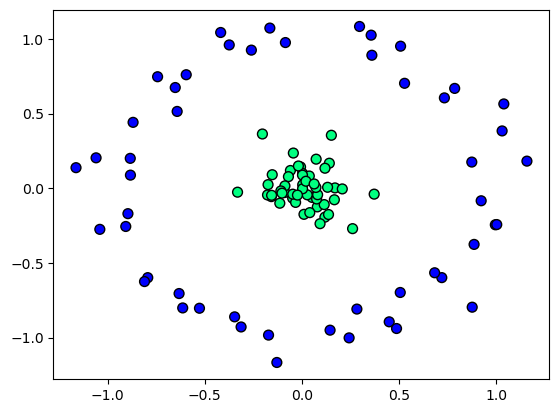

In [23]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');

Kernel lineal

In [25]:
clf = SVC(kernel='linear').fit(X,y)

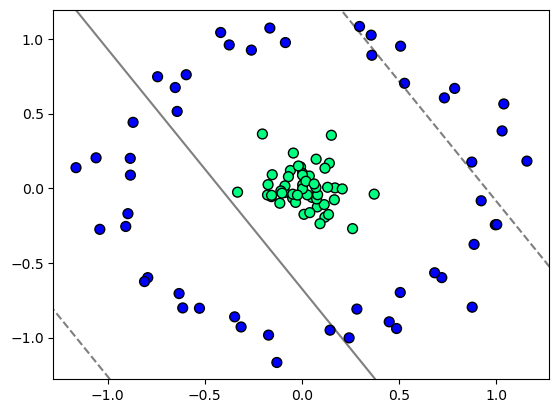

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf, plot_support=False);

Kernel polinómico de grado 2

In [27]:
clf = SVC(kernel='poly', degree=2,C=1e6)
clf.fit(X,y)

SVC(C=1000000.0, degree=2, kernel='poly')

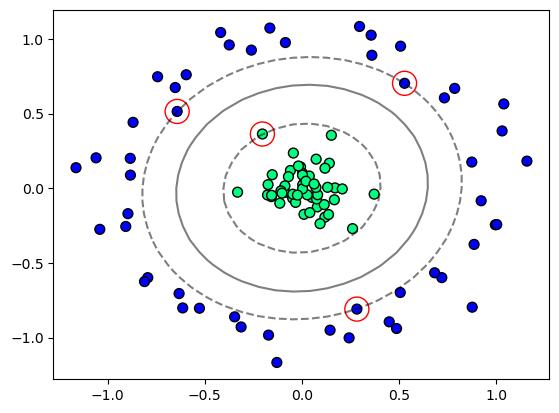

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Kernel RBF

In [29]:
clf = SVC(kernel='rbf', C=1e6)
clf.fit(X,y)

SVC(C=1000000.0)

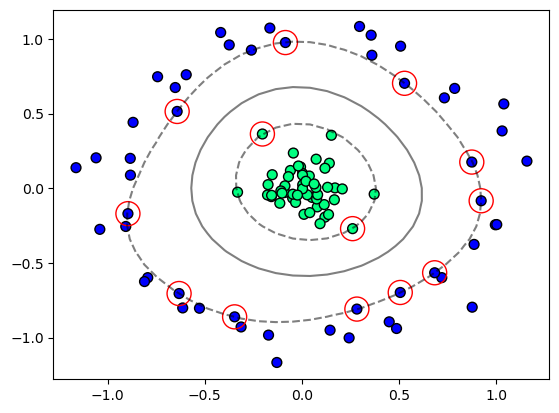

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [31]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter',edgecolors='k')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('r')

interact(plot_3D, elev=[30,45,60], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(30, 45, 60), value=30), IntSlider(value=30, descri…

### SVM en regresión

Aunque SVM es conocido por ser un modelo de clasificación, también puede utilizarse en regresiones, siendo su planteamiento muy similar:

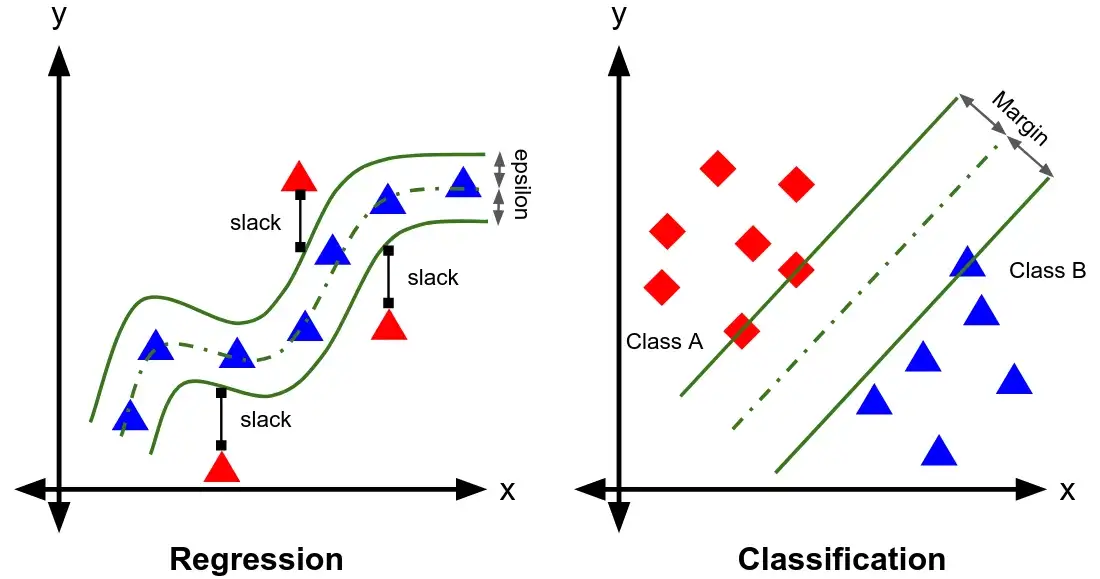

También permite hacer modelos lineales y no lineales (a través de kernels):

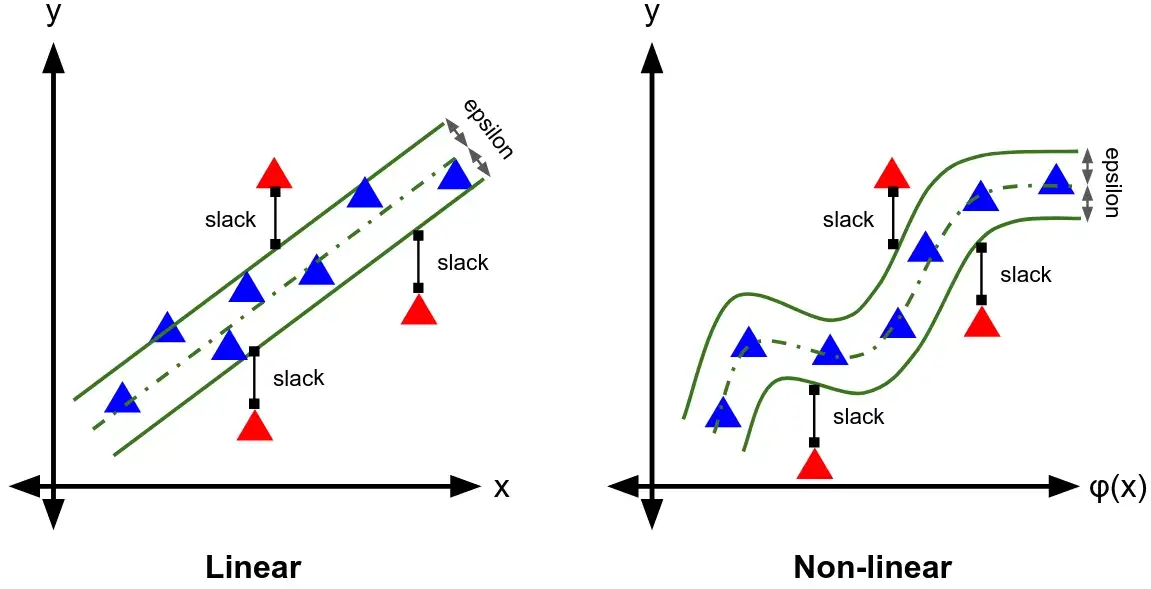

In [32]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

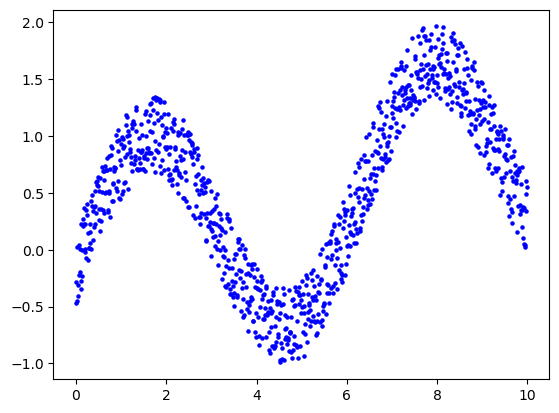

In [34]:
np.random.seed(21)

N =1000

def makeData(x):
    r = [a/10 for a in x]
    y = np.sin(x)+np.random.uniform(-0.5, 0.2, len(x))
    return np.array(y+r)

x = [i/100 for i in range(N)]
y = makeData(x)
x = np.array(x).reshape(-1,1)

plt.scatter(x,y,s=5,color="blue");

In [35]:
svr = SVR()
svr.fit(x,y)

SVR()

In [36]:
yfit = svr.predict(x)

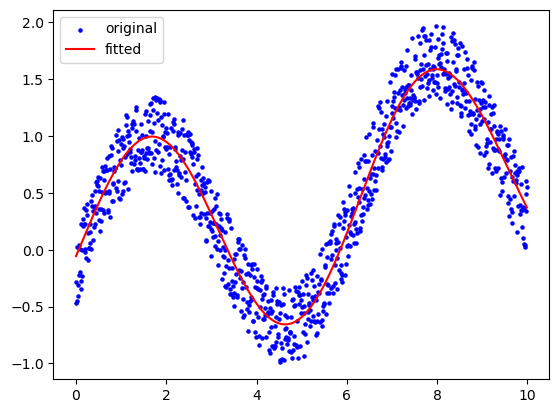

In [37]:
plt.scatter(x, y, s=5, color="blue", label='original')
plt.plot(x, yfit, color="red", label='fitted')
plt.legend()
plt.show()

In [41]:
score = svr.score(x, y)
print('R-squared:', score)
print('MSE:', mean_squared_error(y,yfit))

R-squared: 0.9201610722643554
MSE: 0.041676600207571246
